In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats.mstats import winsorize

# Collecting the time series data from the CSV file

In [2]:
# Collecting the time series data from the CSV file
df = pd.read_csv("/content/creditcard.csv")


# Exploratory Data Analysis (EDA)

In [3]:
# Data quality check, treat missing values, outliers, etc.
print(df.head())
print(df.describe())
df.info()

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [5]:
# Fill missing values with column mean
for column in df.columns:
    if df[column].dtype.kind in 'biufc':
        df[column] = df[column].fillna(df[column].mean())


In [6]:

# Dataset after handling missing values
print("\nDataset after handling missing values:\n", df)
print(df.isnull().sum())

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print("\nNumber of Duplicate Rows:", duplicate_rows.shape[0])

df.drop_duplicates(inplace=True)



Dataset after handling missing values:
         Time        V1        V2        V3        V4        V5        V6  \
0          0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1          0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2          1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3          1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4          2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...      ...       ...       ...       ...       ...       ...       ...   
23318  32696  1.071505  0.187075  0.895129  2.656099 -0.452814  0.179717   
23319  32696  1.329254  0.264064 -0.048885  0.320503  0.048595 -0.678869   
23320  32697  1.323101 -1.393103  0.433789 -1.327880 -1.717583 -0.691175   
23321  32697  1.582101 -1.197678 -1.147417 -2.504297  0.984772  3.234035   
23322  32697  1.398222 -1.236821  0.333811 -1.597716 -1.295506 -0.096330   

             V7        V8        V9  ...      

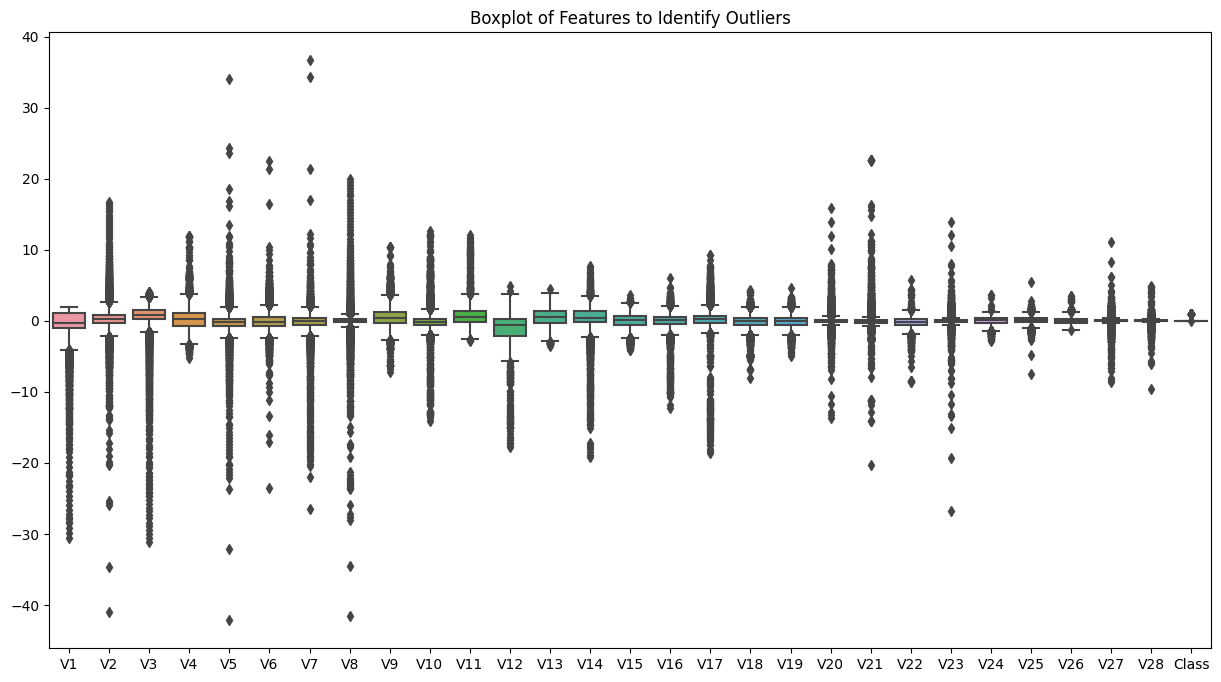

In [7]:
# Visualize outliers using boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.drop(columns=['Time', 'Amount']))
plt.title('Boxplot of Features to Identify Outliers')
plt.show()

# Handling outliers

In [8]:
# Calculate IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [9]:
# Define a filter to identify outliers
outlier_filter = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Remove outliers
df_no_outliers = df[~outlier_filter.any(axis=1)]


In [10]:
# Displaying the shape after handling outliers
print("\nShape after handling outliers:", df_no_outliers.shape)



Shape after handling outliers: (12502, 31)


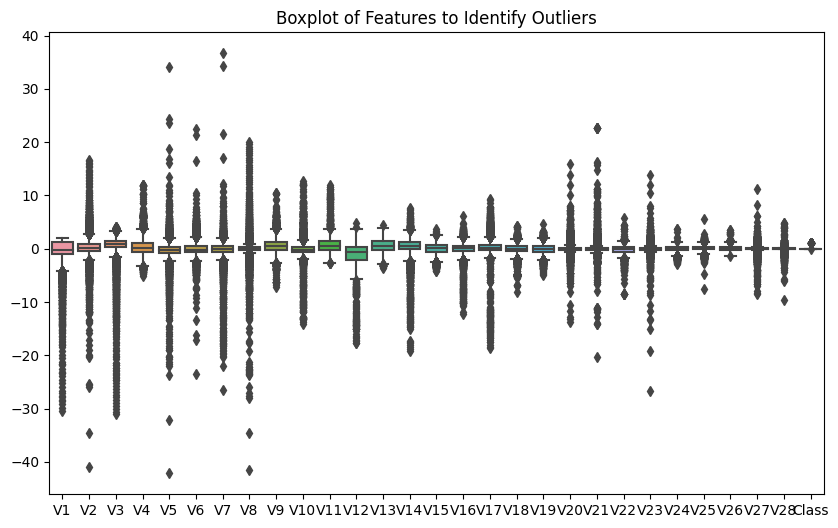

In [11]:
# Visualize df after handling outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=['Time', 'Amount']))
plt.title('Boxplot of Features to Identify Outliers')
plt.show()


# Balancing the data

In [12]:
# Convert 'Class' column to integer
df['Class'] = df['Class'].astype(int)


In [13]:
# Separate features (X) and target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']


In [14]:
# Instantiate the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Convert y to a 1D array if it's not already
y = y.values.ravel()

# Fit and transform the data
X_resampled, y_resampled = ros.fit_resample(X, y)


In [15]:
# Create a new DataFrame with the resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Class')], axis=1)

# Save the balanced dataset to a new CSV file
df_resampled.to_csv("balanced_dataset.csv", index=False)


# Feature Engineering

In [16]:
# Read in the balanced dataset
balanced_df = pd.read_csv("/content/balanced_dataset.csv")

# Scaling numeric features
scaler = StandardScaler()
numeric_columns = ['Amount', 'Time']  # Add other numeric columns as needed
balanced_df[numeric_columns] = scaler.fit_transform(balanced_df[numeric_columns])


In [17]:
# Extracting time-based features
balanced_df['Hour'] = np.floor(balanced_df['Time'] / 3600)  # Assuming time is in seconds
balanced_df['DayOfWeek'] = pd.to_datetime(balanced_df['Time'], unit='s').dt.dayofweek
balanced_df['Month'] = pd.to_datetime(balanced_df['Time'], unit='s').dt.month


In [18]:
# Applying PCA for dimensionality reduction
pca = PCA(n_components=2)  # Adjust the number of components as needed
pca_result = pca.fit_transform(balanced_df.drop(['Class'], axis=1))

balanced_df['PCA1'] = pca_result[:, 0]
balanced_df['PCA2'] = pca_result[:, 1]


In [19]:

# Creating polynomial features
balanced_df['Amount^2'] = balanced_df['Amount'] ** 2

# Binning or Bucketing
bins = np.linspace(0, 1, 11)  # Adjust the number of bins as needed
balanced_df['Amount_Binned'] = pd.cut(balanced_df['Amount'], bins=bins, labels=False)

# Feature Interaction
balanced_df['V1_V2'] = balanced_df['V1'] * balanced_df['V2']

# Handling Outliers (Example: Winsorizing)
balanced_df['Amount'] = winsorize(balanced_df['Amount'], limits=[0.01, 0.01])


In [20]:
# Train/Test Split
X = balanced_df.drop('Class', axis=1)
y = balanced_df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Selection

In [21]:
# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)


# Model Training

In [22]:
# Train the classifier
rf_classifier.fit(X_train_imputed, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_imputed)


# Model Evaluation

In [23]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9998920086393088
